In [32]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intelligenza artificiale/data/titanic.csv')

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


elimina le colonne inutili

In [34]:
df = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis = 1) #con axis diciamo che droppiamo una colonna (axis = 1) di default è 0

In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [36]:
#df['Sex'] = df['Sex'].replace('male',1)
#df

In [37]:
df['Sex'] = (df['Sex'] == 'female').astype(int)
df[:20]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
5,0,3,0,NaN,0,0,8.4583
6,0,1,0,54.0,0,0,51.8625
7,0,3,0,2.0,3,1,21.0750
8,1,3,1,27.0,0,2,11.1333
9,1,2,1,14.0,1,0,30.0708


In [38]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
889,1,1,0,26.0,0,0,30.0000


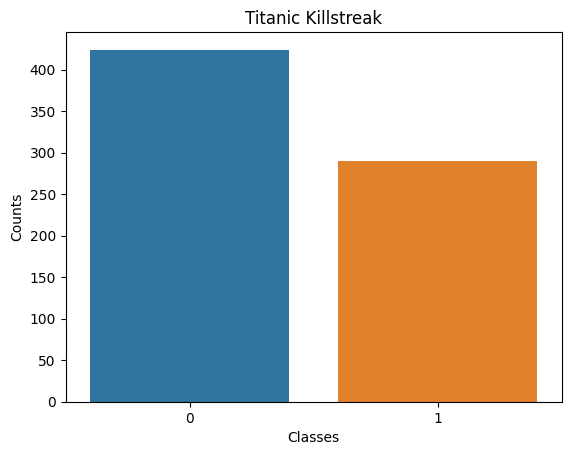

In [39]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Survived", data=df)
plt.title("Titanic Killstreak")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [40]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,1:]
y=dfnp[:,0] 


import collections
collections.Counter(y)

Counter({0.0: 424, 1.0: 290})

In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

#Knn


In [42]:

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5) 
neigh.fit(X_train, y_train) 

predict = neigh.predict(X_test) 


print(f'dati predetti dal metodo =                {predict[:10]}') 
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') 

dati predetti dal metodo =                [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


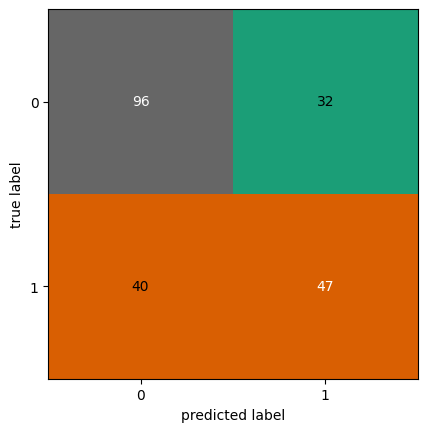

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [44]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       128
         1.0       0.59      0.54      0.57        87

    accuracy                           0.67       215
   macro avg       0.65      0.65      0.65       215
weighted avg       0.66      0.67      0.66       215



In [45]:
Maria = [[1,	1,	78.0,	1	,0	,8.2500]]
predictMaria = neigh.predict(Maria)
predictMaria

array([0.])

#Decision tree

In [68]:
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:15]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:15]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


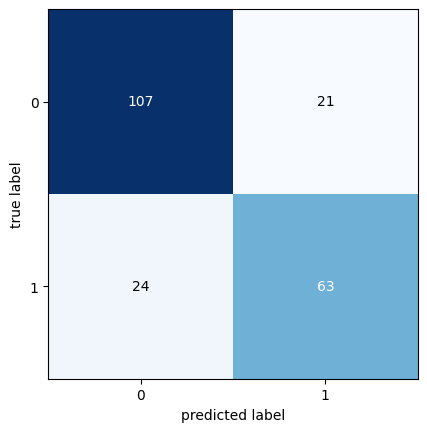

In [69]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [70]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       128
         1.0       0.75      0.72      0.74        87

    accuracy                           0.79       215
   macro avg       0.78      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215



['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


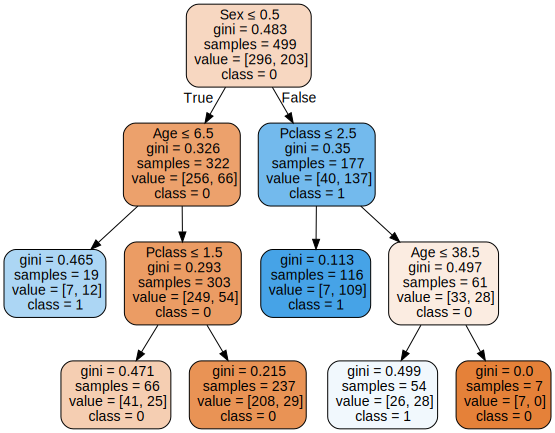

In [48]:
features=list(df.columns.values)
print(features)
print(features[1:])
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[1:], #vi sono tutte le colonne tranne quella della variabile dipendente 
                     class_names=['0','1'],  #attento qua che devi mettere tutti i valori possibili che ci sono nella variabile dipendete (none) 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Money')
graph

In [49]:
from sklearn.tree import export_text
r = export_text(tree_clf, feature_names=features[0:-1])
print(r)

|--- Pclass <= 0.50
|   |--- Sex <= 6.50
|   |   |--- class: 1.0
|   |--- Sex >  6.50
|   |   |--- Survived <= 1.50
|   |   |   |--- class: 0.0
|   |   |--- Survived >  1.50
|   |   |   |--- class: 0.0
|--- Pclass >  0.50
|   |--- Survived <= 2.50
|   |   |--- class: 1.0
|   |--- Survived >  2.50
|   |   |--- Sex <= 38.50
|   |   |   |--- class: 1.0
|   |   |--- Sex >  38.50
|   |   |   |--- class: 0.0



#Random Forest


In [71]:
from sklearn.ensemble import RandomForestClassifier

# impostiamo i parametri del metodo

rndforst_clf = RandomForestClassifier(criterion="gini",
                                       max_depth=8,
                                       min_samples_split=10,
                                       random_state=5
)

rndforst_clf.fit(X_train,y_train)



RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [72]:
print(f'dati predetti dal metodo =                {predict[:15]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:15]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
dati reali presenti nel dataset di test = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]


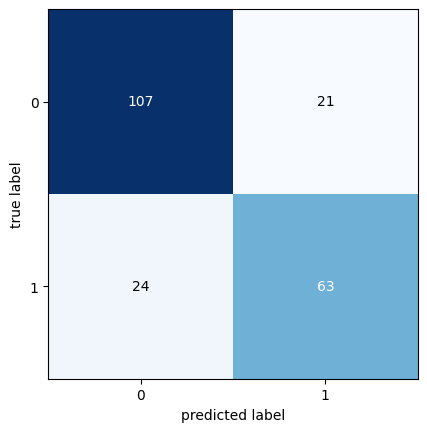

In [73]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [74]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       128
         1.0       0.75      0.72      0.74        87

    accuracy                           0.79       215
   macro avg       0.78      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215

